In [19]:
# ================================================
# ETAPA 4 - PARTE 1 (COM CORREÇÃO)
# ================================================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# ------------------------------------------------
# 1. Carregar dataset já limpo
# ------------------------------------------------
df = pd.read_csv("../data/processed/students_performance_clean.csv")

# ------------------------------------------------
# 2. Selecionar colunas numéricas
# ------------------------------------------------
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
target = "final_grade"

X = df[numeric_cols].drop(columns=[target])
y = df[target]

# ------------------------------------------------
# 3. Train / Test / Validation Split
# ------------------------------------------------
# primeiro: train vs test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# segundo: validação a partir do treino (20% do treino)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.20, random_state=42
)

# ------------------------------------------------
# 4. Imputação
# ------------------------------------------------
imputer = SimpleImputer(strategy="mean")
X_train_imp = imputer.fit_transform(X_train)
X_val_imp = imputer.transform(X_val)
X_test_imp = imputer.transform(X_test)

# ------------------------------------------------
# 5. Normalização
# ------------------------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imp)
X_val_scaled = scaler.transform(X_val_imp)
X_test_scaled = scaler.transform(X_test_imp)

# ------------------------------------------------
# 6. Criar X_train_combined (treino + validação)
# ------------------------------------------------
X_train_combined = np.vstack([X_train_scaled, X_val_scaled])
y_train_combined = np.concatenate([y_train.values, y_val.values])

print("✓ Dados prontos para a PARTE 2")
print("X_train_combined:", X_train_combined.shape)
print("y_train_combined:", y_train_combined.shape)
print("X_val:", X_val_scaled.shape)
print("X_test:", X_test_scaled.shape)

# ------------------------------------------------
# Vars finais usadas na PARTE 2
# ------------------------------------------------
X_train = X_train_scaled
X_val = X_val_scaled
X_test = X_test_scaled


✓ Dados prontos para a PARTE 2
X_train_combined: (2008, 6)
y_train_combined: (2008,)
X_val: (402, 6)
X_test: (502, 6)


In [20]:
"""
ETAPA 4: OTIMIZAÇÃO E TUNING DE HIPERPARÂMETROS
PARTE 2: MODELOS BASE (SEM GERAR ARQUIVOS)
==========================================

⚠️ IMPORTANTE: Cole APÓS a PARTE 1
"""

# ============================================================================
# PASSO 1: TREINAR MODELOS BASE (SEM TUNING)
# ============================================================================

print("\n" + "=" * 80)
print("PASSO 1: TREINANDO MODELOS BASE (SEM TUNING)")
print("=" * 80)

resultados = {}

# ---- MODELO 1: REGRESSÃO LINEAR ----
print("\n" + "-" * 80)
print("1. REGRESSÃO LINEAR (Baseline)")
print("-" * 80)

modelo_lr = LinearRegression()
modelo_lr.fit(X_train_combined, y_train_combined)

y_val_pred_lr = modelo_lr.predict(X_val)
y_test_pred_lr = modelo_lr.predict(X_test)

r2_val_lr = r2_score(y_val, y_val_pred_lr)
rmse_val_lr = np.sqrt(mean_squared_error(y_val, y_val_pred_lr))
mae_val_lr = mean_absolute_error(y_val, y_val_pred_lr)

print(f"\n✓ Regressão Linear Treinada")
print(f"  R² (Validação):   {r2_val_lr:.4f}")
print(f"  RMSE (Validação): {rmse_val_lr:.4f}")
print(f"  MAE (Validação):  {mae_val_lr:.4f}")

resultados['Linear Regression'] = {
    'modelo': modelo_lr,
    'r2_val': r2_val_lr,
    'rmse_val': rmse_val_lr,
    'mae_val': mae_val_lr,
    'y_pred_val': y_val_pred_lr,
    'y_pred_test': y_test_pred_lr,
    'tipo': 'baseline'
}

# ---- MODELO 2: RANDOM FOREST (PADRÃO) ----
print("\n" + "-" * 80)
print("2. RANDOM FOREST (Padrão - Sem Tuning)")
print("-" * 80)

modelo_rf_base = RandomForestRegressor(
    n_estimators=100,
    random_state=RANDOM_STATE,
    n_jobs=-1,
    verbose=1
)
modelo_rf_base.fit(X_train_combined, y_train_combined)

y_val_pred_rf_base = modelo_rf_base.predict(X_val)
y_test_pred_rf_base = modelo_rf_base.predict(X_test)

r2_val_rf_base = r2_score(y_val, y_val_pred_rf_base)
rmse_val_rf_base = np.sqrt(mean_squared_error(y_val, y_val_pred_rf_base))
mae_val_rf_base = mean_absolute_error(y_val, y_val_pred_rf_base)

print(f"\n✓ Random Forest Base Treinada")
print(f"  R² (Validação):   {r2_val_rf_base:.4f}")
print(f"  RMSE (Validação): {rmse_val_rf_base:.4f}")
print(f"  MAE (Validação):  {mae_val_rf_base:.4f}")

resultados['Random Forest Base'] = {
    'modelo': modelo_rf_base,
    'r2_val': r2_val_rf_base,
    'rmse_val': rmse_val_rf_base,
    'mae_val': mae_val_rf_base,
    'y_pred_val': y_val_pred_rf_base,
    'y_pred_test': y_test_pred_rf_base,
    'tipo': 'base'
}

# ---- MODELO 3: XGBOOST (PADRÃO) ----
print("\n" + "-" * 80)
print("3. XGBOOST (Padrão - Sem Tuning)")
print("-" * 80)

modelo_xgb_base = XGBRegressor(
    n_estimators=100,
    random_state=RANDOM_STATE,
    verbose=0
)
modelo_xgb_base.fit(X_train_combined, y_train_combined)

y_val_pred_xgb_base = modelo_xgb_base.predict(X_val)
y_test_pred_xgb_base = modelo_xgb_base.predict(X_test)

r2_val_xgb_base = r2_score(y_val, y_val_pred_xgb_base)
rmse_val_xgb_base = np.sqrt(mean_squared_error(y_val, y_val_pred_xgb_base))
mae_val_xgb_base = mean_absolute_error(y_val, y_val_pred_xgb_base)

print(f"\n✓ XGBoost Base Treinada")
print(f"  R² (Validação):   {r2_val_xgb_base:.4f}")
print(f"  RMSE (Validação): {rmse_val_xgb_base:.4f}")
print(f"  MAE (Validação):  {mae_val_xgb_base:.4f}")

resultados['XGBoost Base'] = {
    'modelo': modelo_xgb_base,
    'r2_val': r2_val_xgb_base,
    'rmse_val': rmse_val_xgb_base,
    'mae_val': mae_val_xgb_base,
    'y_pred_val': y_val_pred_xgb_base,
    'y_pred_test': y_test_pred_xgb_base,
    'tipo': 'base'
}

# Tabela Comparativa
print("\n" + "=" * 80)
print("COMPARAÇÃO DOS MODELOS BASE")
print("=" * 80)

tabela_base = pd.DataFrame({
    'Modelo': ['Linear Regression', 'Random Forest Base', 'XGBoost Base'],
    'R² (Val)': [r2_val_lr, r2_val_rf_base, r2_val_xgb_base],
    'RMSE (Val)': [rmse_val_lr, rmse_val_rf_base, rmse_val_xgb_base],
    'MAE (Val)': [mae_val_lr, mae_val_rf_base, mae_val_xgb_base]
})

print(tabela_base.to_string(index=False))

print("\n✅ PARTE 2 CONCLUÍDA!")
print("=" * 80)


PASSO 1: TREINANDO MODELOS BASE (SEM TUNING)

--------------------------------------------------------------------------------
1. REGRESSÃO LINEAR (Baseline)
--------------------------------------------------------------------------------

✓ Regressão Linear Treinada
  R² (Validação):   0.2918
  RMSE (Validação): 0.8537
  MAE (Validação):  0.6875

--------------------------------------------------------------------------------
2. RANDOM FOREST (Padrão - Sem Tuning)
--------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=24)]: Using backend ThreadingBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=24)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=24)]: Using backend ThreadingBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=24)]: Done 100 out of 100 | elapsed:    0.0s finished



✓ Random Forest Base Treinada
  R² (Validação):   0.9316
  RMSE (Validação): 0.2654
  MAE (Validação):  0.2084

--------------------------------------------------------------------------------
3. XGBOOST (Padrão - Sem Tuning)
--------------------------------------------------------------------------------

✓ XGBoost Base Treinada
  R² (Validação):   0.9681
  RMSE (Validação): 0.1812
  MAE (Validação):  0.1244

COMPARAÇÃO DOS MODELOS BASE
            Modelo  R² (Val)  RMSE (Val)  MAE (Val)
 Linear Regression  0.291838    0.853726   0.687535
Random Forest Base  0.931582    0.265361   0.208362
      XGBoost Base  0.968087    0.181233   0.124427

✅ PARTE 2 CONCLUÍDA!


In [21]:
"""
ETAPA 4: OTIMIZAÇÃO E TUNING DE HIPERPARÂMETROS
PARTE 3: RANDOM SEARCH PARA RANDOM FOREST (SEM GERAR ARQUIVOS)
============================================================

⚠️ IMPORTANTE: Cole APÓS a PARTE 2
"""

# ============================================================================
# PASSO 2: RANDOM SEARCH PARA RANDOM FOREST
# ============================================================================

print("\n" + "=" * 80)
print("PASSO 2: RANDOM SEARCH PARA RANDOM FOREST")
print("=" * 80)

print("\nExecutando Random Search com 50 iterações...")
print("(Isso pode demorar alguns minutos...)\n")

param_dist_rf = {
    'n_estimators': [50, 100, 150, 200, 250],
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

random_search_rf = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=RANDOM_STATE, n_jobs=-1),
    param_distributions=param_dist_rf,
    n_iter=50,
    cv=5,
    scoring='r2',
    random_state=RANDOM_STATE,
    verbose=1,
    n_jobs=-1
)

random_search_rf.fit(X_train_combined, y_train_combined)

print("\n" + "=" * 80)
print("RESULTADOS DO RANDOM SEARCH - RANDOM FOREST")
print("=" * 80)

print(f"\n✓ Melhor R² encontrado: {random_search_rf.best_score_:.4f}")
print(f"\nMelhores Hiperparâmetros:")
for param, valor in random_search_rf.best_params_.items():
    print(f"  {param}: {valor}")

melhor_modelo_rf = random_search_rf.best_estimator_

y_val_pred_rf_tuned = melhor_modelo_rf.predict(X_val)
y_test_pred_rf_tuned = melhor_modelo_rf.predict(X_test)

r2_val_rf_tuned = r2_score(y_val, y_val_pred_rf_tuned)
rmse_val_rf_tuned = np.sqrt(mean_squared_error(y_val, y_val_pred_rf_tuned))
mae_val_rf_tuned = mean_absolute_error(y_val, y_val_pred_rf_tuned)

print(f"\n" + "-" * 80)
print("PERFORMANCE DO MODELO OTIMIZADO (VALIDAÇÃO)")
print("-" * 80)
print(f"R² (Validação):   {r2_val_rf_tuned:.4f}")
print(f"RMSE (Validação): {rmse_val_rf_tuned:.4f}")
print(f"MAE (Validação):  {mae_val_rf_tuned:.4f}")

print(f"\n" + "-" * 80)
print("COMPARAÇÃO: RANDOM FOREST BASE vs OTIMIZADO")
print("-" * 80)

melhoria_r2 = r2_val_rf_tuned - r2_val_rf_base
melhoria_rmse = rmse_val_rf_base - rmse_val_rf_tuned
melhoria_mae = mae_val_rf_base - mae_val_rf_tuned

print(f"\nR² (Validação):")
print(f"  Antes:     {r2_val_rf_base:.4f}")
print(f"  Depois:    {r2_val_rf_tuned:.4f}")
print(f"  Melhoria:  {melhoria_r2:+.4f} ({(melhoria_r2/r2_val_rf_base)*100:+.2f}%)")

print(f"\nRMSE (Validação):")
print(f"  Antes:     {rmse_val_rf_base:.4f}")
print(f"  Depois:    {rmse_val_rf_tuned:.4f}")
print(f"  Melhoria:  {melhoria_rmse:+.4f} ({(melhoria_rmse/rmse_val_rf_base)*100:+.2f}%)")

print(f"\nMAE (Validação):")
print(f"  Antes:     {mae_val_rf_base:.4f}")
print(f"  Depois:    {mae_val_rf_tuned:.4f}")
print(f"  Melhoria:  {melhoria_mae:+.4f} ({(melhoria_mae/mae_val_rf_base)*100:+.2f}%)")

resultados['Random Forest Otimizado'] = {
    'modelo': melhor_modelo_rf,
    'r2_val': r2_val_rf_tuned,
    'rmse_val': rmse_val_rf_tuned,
    'mae_val': mae_val_rf_tuned,
    'y_pred_val': y_val_pred_rf_tuned,
    'y_pred_test': y_test_pred_rf_tuned,
    'tipo': 'otimizado',
    'best_params': random_search_rf.best_params_,
    'cv_score': random_search_rf.best_score_
}

print("\n✅ PARTE 3 CONCLUÍDA!")
print("=" * 80)


PASSO 2: RANDOM SEARCH PARA RANDOM FOREST

Executando Random Search com 50 iterações...
(Isso pode demorar alguns minutos...)

Fitting 5 folds for each of 50 candidates, totalling 250 fits

RESULTADOS DO RANDOM SEARCH - RANDOM FOREST

✓ Melhor R² encontrado: 0.5164

Melhores Hiperparâmetros:
  n_estimators: 100
  min_samples_split: 15
  min_samples_leaf: 1
  max_features: log2
  max_depth: 15
  bootstrap: True

--------------------------------------------------------------------------------
PERFORMANCE DO MODELO OTIMIZADO (VALIDAÇÃO)
--------------------------------------------------------------------------------
R² (Validação):   0.7516
RMSE (Validação): 0.5056
MAE (Validação):  0.3986

--------------------------------------------------------------------------------
COMPARAÇÃO: RANDOM FOREST BASE vs OTIMIZADO
--------------------------------------------------------------------------------

R² (Validação):
  Antes:     0.9316
  Depois:    0.7516
  Melhoria:  -0.1799 (-19.32%)

RMSE (V

In [22]:
"""
ETAPA 4: OTIMIZAÇÃO E TUNING DE HIPERPARÂMETROS
PARTE 4: RANDOM SEARCH PARA XGBOOST (SEM GERAR ARQUIVOS)
======================================================

⚠️ IMPORTANTE: Cole APÓS a PARTE 3
"""

# ============================================================================
# PASSO 3: RANDOM SEARCH PARA XGBOOST
# ============================================================================

print("\n" + "=" * 80)
print("PASSO 3: RANDOM SEARCH PARA XGBOOST")
print("=" * 80)

print("\nExecutando Random Search com 50 iterações...")
print("(Isso pode demorar alguns minutos...)\n")

param_dist_xgb = {
    'n_estimators': [50, 100, 150, 200, 250],
    'max_depth': [3, 4, 5, 6, 7, 8],
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.5, 1, 2],
    'min_child_weight': [1, 2, 3, 4, 5]
}

random_search_xgb = RandomizedSearchCV(
    estimator=XGBRegressor(random_state=RANDOM_STATE, verbosity=0),
    param_distributions=param_dist_xgb,
    n_iter=50,
    cv=5,
    scoring='r2',
    random_state=RANDOM_STATE,
    verbose=1,
    n_jobs=-1
)

random_search_xgb.fit(X_train_combined, y_train_combined)

print("\n" + "=" * 80)
print("RESULTADOS DO RANDOM SEARCH - XGBOOST")
print("=" * 80)

print(f"\n✓ Melhor R² encontrado: {random_search_xgb.best_score_:.4f}")
print(f"\nMelhores Hiperparâmetros:")
for param, valor in random_search_xgb.best_params_.items():
    print(f"  {param}: {valor}")

melhor_modelo_xgb = random_search_xgb.best_estimator_

y_val_pred_xgb_tuned = melhor_modelo_xgb.predict(X_val)
y_test_pred_xgb_tuned = melhor_modelo_xgb.predict(X_test)

r2_val_xgb_tuned = r2_score(y_val, y_val_pred_xgb_tuned)
rmse_val_xgb_tuned = np.sqrt(mean_squared_error(y_val, y_val_pred_xgb_tuned))
mae_val_xgb_tuned = mean_absolute_error(y_val, y_val_pred_xgb_tuned)

print(f"\n" + "-" * 80)
print("PERFORMANCE DO MODELO OTIMIZADO (VALIDAÇÃO)")
print("-" * 80)
print(f"R² (Validação):   {r2_val_xgb_tuned:.4f}")
print(f"RMSE (Validação): {rmse_val_xgb_tuned:.4f}")
print(f"MAE (Validação):  {mae_val_xgb_tuned:.4f}")

print(f"\n" + "-" * 80)
print("COMPARAÇÃO: XGBOOST BASE vs OTIMIZADO")
print("-" * 80)

melhoria_r2_xgb = r2_val_xgb_tuned - r2_val_xgb_base
melhoria_rmse_xgb = rmse_val_xgb_base - rmse_val_xgb_tuned
melhoria_mae_xgb = mae_val_xgb_base - mae_val_xgb_tuned

print(f"\nR² (Validação):")
print(f"  Antes:     {r2_val_xgb_base:.4f}")
print(f"  Depois:    {r2_val_xgb_tuned:.4f}")
print(f"  Melhoria:  {melhoria_r2_xgb:+.4f} ({(melhoria_r2_xgb/r2_val_xgb_base)*100:+.2f}%)")

print(f"\nRMSE (Validação):")
print(f"  Antes:     {rmse_val_xgb_base:.4f}")
print(f"  Depois:    {rmse_val_xgb_tuned:.4f}")
print(f"  Melhoria:  {melhoria_rmse_xgb:+.4f} ({(melhoria_rmse_xgb/rmse_val_xgb_base)*100:+.2f}%)")

print(f"\nMAE (Validação):")
print(f"  Antes:     {mae_val_xgb_base:.4f}")
print(f"  Depois:    {mae_val_xgb_tuned:.4f}")
print(f"  Melhoria:  {melhoria_mae_xgb:+.4f} ({(melhoria_mae_xgb/mae_val_xgb_base)*100:+.2f}%)")

resultados['XGBoost Otimizado'] = {
    'modelo': melhor_modelo_xgb,
    'r2_val': r2_val_xgb_tuned,
    'rmse_val': rmse_val_xgb_tuned,
    'mae_val': mae_val_xgb_tuned,
    'y_pred_val': y_val_pred_xgb_tuned,
    'y_pred_test': y_test_pred_xgb_tuned,
    'tipo': 'otimizado',
    'best_params': random_search_xgb.best_params_,
    'cv_score': random_search_xgb.best_score_
}

print("\n✅ PARTE 4 CONCLUÍDA!")
print("=" * 80)


PASSO 3: RANDOM SEARCH PARA XGBOOST

Executando Random Search com 50 iterações...
(Isso pode demorar alguns minutos...)

Fitting 5 folds for each of 50 candidates, totalling 250 fits

RESULTADOS DO RANDOM SEARCH - XGBOOST

✓ Melhor R² encontrado: 0.5287

Melhores Hiperparâmetros:
  subsample: 0.6
  n_estimators: 250
  min_child_weight: 2
  max_depth: 3
  learning_rate: 0.05
  gamma: 2
  colsample_bytree: 0.6

--------------------------------------------------------------------------------
PERFORMANCE DO MODELO OTIMIZADO (VALIDAÇÃO)
--------------------------------------------------------------------------------
R² (Validação):   0.5963
RMSE (Validação): 0.6446
MAE (Validação):  0.5016

--------------------------------------------------------------------------------
COMPARAÇÃO: XGBOOST BASE vs OTIMIZADO
--------------------------------------------------------------------------------

R² (Validação):
  Antes:     0.9681
  Depois:    0.5963
  Melhoria:  -0.3717 (-38.40%)

RMSE (Validação


PASSO 4: COMPARAÇÃO DOS 5 MODELOS

RANKING DE MODELOS (VALIDAÇÃO)
                 Modelo  R² (Val)  RMSE (Val)  MAE (Val)
           XGBoost Base  0.968087    0.181233   0.124427
     Random Forest Base  0.931582    0.265361   0.208362
Random Forest Otimizado  0.751644    0.505580   0.398567
      XGBoost Otimizado  0.596343    0.644553   0.501588
      Linear Regression  0.291838    0.853726   0.687535

🏆 MELHOR MODELO: XGBoost Base
  R² (Validação):   0.9681
  RMSE (Validação): 0.1812
  MAE (Validação):  0.1244

--------------------------------------------------------------------------------
MELHORIA EM RELAÇÃO AO BASELINE (LINEAR REGRESSION)
--------------------------------------------------------------------------------
R² do Baseline:    0.2918
R² do Melhor:      0.9681
Melhoria:          +231.72%


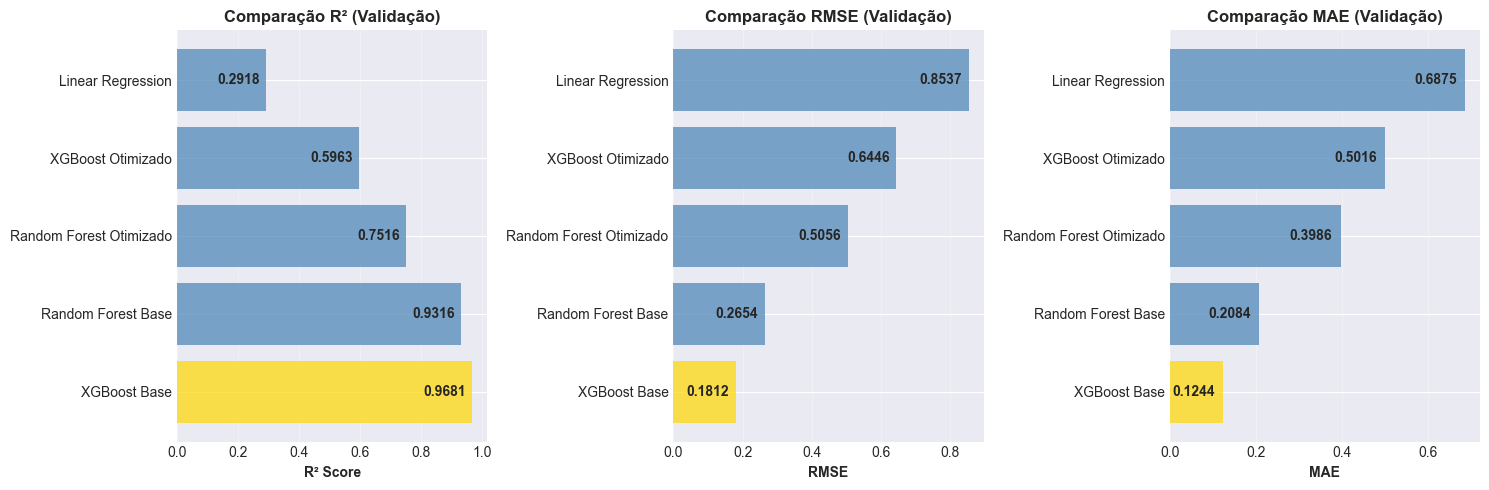


✅ PARTE 5 CONCLUÍDA!


In [23]:
"""
ETAPA 4: OTIMIZAÇÃO E TUNING DE HIPERPARÂMETROS
PARTE 5: COMPARAÇÃO DOS 5 MODELOS (GRÁFICOS NO NOTEBOOK)
======================================================

⚠️ IMPORTANTE: Cole APÓS a PARTE 4
"""

# ============================================================================
# PASSO 4: COMPARAÇÃO DOS 5 MODELOS
# ============================================================================

print("\n" + "=" * 80)
print("PASSO 4: COMPARAÇÃO DOS 5 MODELOS")
print("=" * 80)

# Criar tabela comparativa
tabela_comparativa = pd.DataFrame({
    'Modelo': list(resultados.keys()),
    'R² (Val)': [resultados[m]['r2_val'] for m in resultados.keys()],
    'RMSE (Val)': [resultados[m]['rmse_val'] for m in resultados.keys()],
    'MAE (Val)': [resultados[m]['mae_val'] for m in resultados.keys()]
})

tabela_comparativa = tabela_comparativa.sort_values('R² (Val)', ascending=False)

print("\n" + "=" * 80)
print("RANKING DE MODELOS (VALIDAÇÃO)")
print("=" * 80)
print(tabela_comparativa.to_string(index=False))

# Melhor modelo
melhor_nome = tabela_comparativa.iloc[0]['Modelo']
melhor_r2 = tabela_comparativa.iloc[0]['R² (Val)']
melhor_rmse = tabela_comparativa.iloc[0]['RMSE (Val)']
melhor_mae = tabela_comparativa.iloc[0]['MAE (Val)']

print(f"\n" + "=" * 80)
print(f"🏆 MELHOR MODELO: {melhor_nome}")
print("=" * 80)
print(f"  R² (Validação):   {melhor_r2:.4f}")
print(f"  RMSE (Validação): {melhor_rmse:.4f}")
print(f"  MAE (Validação):  {melhor_mae:.4f}")

# Comparação com baseline
baseline_r2 = resultados['Linear Regression']['r2_val']
melhoria_em_r2 = ((melhor_r2 - baseline_r2) / baseline_r2) * 100

print(f"\n" + "-" * 80)
print("MELHORIA EM RELAÇÃO AO BASELINE (LINEAR REGRESSION)")
print("-" * 80)
print(f"R² do Baseline:    {baseline_r2:.4f}")
print(f"R² do Melhor:      {melhor_r2:.4f}")
print(f"Melhoria:          {melhoria_em_r2:+.2f}%")

# Gráfico Comparativo (SEM SALVAR)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# R²
ax1 = axes[0]
cores_r2 = ['gold' if x == tabela_comparativa.iloc[0]['Modelo'] else 'steelblue' 
            for x in tabela_comparativa['Modelo']]
ax1.barh(tabela_comparativa['Modelo'], tabela_comparativa['R² (Val)'], color=cores_r2, alpha=0.7)
ax1.set_xlabel('R² Score', fontweight='bold')
ax1.set_title('Comparação R² (Validação)', fontweight='bold', fontsize=12)
ax1.grid(True, alpha=0.3, axis='x')
for i, v in enumerate(tabela_comparativa['R² (Val)']):
    ax1.text(v - 0.02, i, f'{v:.4f}', va='center', ha='right', fontweight='bold')

# RMSE
ax2 = axes[1]
cores_rmse = ['gold' if x == tabela_comparativa.iloc[0]['Modelo'] else 'steelblue' 
              for x in tabela_comparativa['Modelo']]
ax2.barh(tabela_comparativa['Modelo'], tabela_comparativa['RMSE (Val)'], color=cores_rmse, alpha=0.7)
ax2.set_xlabel('RMSE', fontweight='bold')
ax2.set_title('Comparação RMSE (Validação)', fontweight='bold', fontsize=12)
ax2.grid(True, alpha=0.3, axis='x')
for i, v in enumerate(tabela_comparativa['RMSE (Val)']):
    ax2.text(v - 0.02, i, f'{v:.4f}', va='center', ha='right', fontweight='bold')

# MAE
ax3 = axes[2]
cores_mae = ['gold' if x == tabela_comparativa.iloc[0]['Modelo'] else 'steelblue' 
             for x in tabela_comparativa['Modelo']]
ax3.barh(tabela_comparativa['Modelo'], tabela_comparativa['MAE (Val)'], color=cores_mae, alpha=0.7)
ax3.set_xlabel('MAE', fontweight='bold')
ax3.set_title('Comparação MAE (Validação)', fontweight='bold', fontsize=12)
ax3.grid(True, alpha=0.3, axis='x')
for i, v in enumerate(tabela_comparativa['MAE (Val)']):
    ax3.text(v - 0.02, i, f'{v:.4f}', va='center', ha='right', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n✅ PARTE 5 CONCLUÍDA!")
print("=" * 80)


PASSO 5: AVALIAÇÃO NO CONJUNTO DE TESTE

⚠️  ATENÇÃO: Avaliação final no conjunto de TESTE (usado apenas uma vez!)

RESULTADOS NO CONJUNTO DE TESTE
                 Modelo  R² (Test)  RMSE (Test)  MAE (Test)  R² (Val)  RMSE (Val)
      XGBoost Otimizado   0.528799     0.654256    0.503488  0.596343    0.644553
Random Forest Otimizado   0.498851     0.674727    0.518471  0.751644    0.505580
     Random Forest Base   0.478109     0.688549    0.523206  0.931582    0.265361
           XGBoost Base   0.374090     0.754051    0.573238  0.968087    0.181233
      Linear Regression   0.202432     0.851194    0.689846  0.291838    0.853726

--------------------------------------------------------------------------------
ANÁLISE DE OVERFITTING (Val vs Test)
--------------------------------------------------------------------------------

XGBoost Otimizado:
  R² Val:        0.5963
  R² Test:       0.5288
  Diferença:     0.0675  ⚠️  Possível overfitting

Random Forest Otimizado:
  R² Val:      

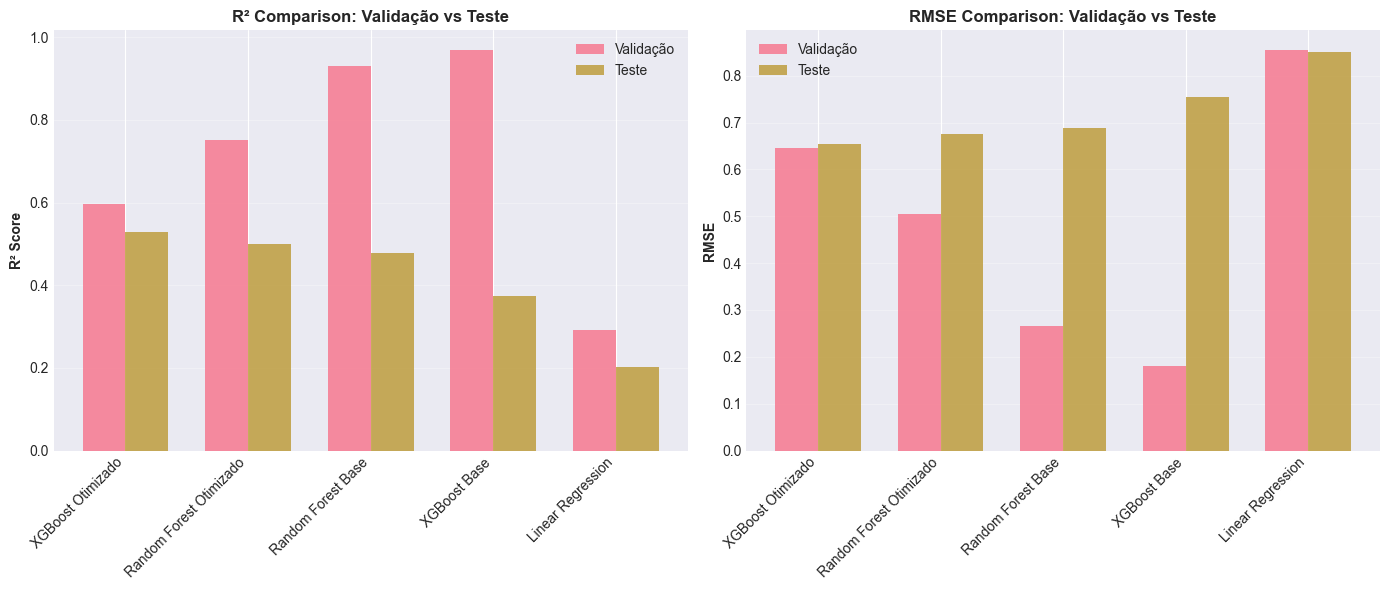


✅ PARTE 6 CONCLUÍDA!


In [24]:
"""
ETAPA 4: OTIMIZAÇÃO E TUNING DE HIPERPARÂMETROS
PARTE 6: AVALIAÇÃO NO CONJUNTO DE TESTE (GRÁFICOS NO NOTEBOOK)
============================================================

⚠️ IMPORTANTE: Cole APÓS a PARTE 5
⚠️ Conjunto de teste é usado APENAS aqui, uma única vez!
"""

# ============================================================================
# PASSO 5: AVALIAÇÃO NO CONJUNTO DE TESTE
# ============================================================================

print("\n" + "=" * 80)
print("PASSO 5: AVALIAÇÃO NO CONJUNTO DE TESTE")
print("=" * 80)
print("\n⚠️  ATENÇÃO: Avaliação final no conjunto de TESTE (usado apenas uma vez!)")

# Calcular métricas para todos os modelos no TESTE
tabela_teste = []

for nome_modelo, dados_modelo in resultados.items():
    y_pred_test = dados_modelo['y_pred_test']
    
    r2_test = r2_score(y_test, y_pred_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    mae_test = mean_absolute_error(y_test, y_pred_test)
    
    tabela_teste.append({
        'Modelo': nome_modelo,
        'R² (Test)': r2_test,
        'RMSE (Test)': rmse_test,
        'MAE (Test)': mae_test,
        'R² (Val)': dados_modelo['r2_val'],
        'RMSE (Val)': dados_modelo['rmse_val']
    })
    
    dados_modelo['r2_test'] = r2_test
    dados_modelo['rmse_test'] = rmse_test
    dados_modelo['mae_test'] = mae_test

tabela_teste_df = pd.DataFrame(tabela_teste).sort_values('R² (Test)', ascending=False)

print("\n" + "=" * 80)
print("RESULTADOS NO CONJUNTO DE TESTE")
print("=" * 80)
print(tabela_teste_df.to_string(index=False))

# Análise de overfitting
print(f"\n" + "-" * 80)
print("ANÁLISE DE OVERFITTING (Val vs Test)")
print("-" * 80)

for idx, row in tabela_teste_df.iterrows():
    nome = row['Modelo']
    diff_r2 = abs(row['R² (Val)'] - row['R² (Test)'])
    status = "✅ Sem overfitting" if diff_r2 < 0.05 else "⚠️  Possível overfitting" if diff_r2 < 0.15 else "❌ Overfitting significativo"
    print(f"\n{nome}:")
    print(f"  R² Val:        {row['R² (Val)']:.4f}")
    print(f"  R² Test:       {row['R² (Test)']:.4f}")
    print(f"  Diferença:     {diff_r2:.4f}  {status}")

# Melhor modelo no TESTE
melhor_nome_teste = tabela_teste_df.iloc[0]['Modelo']
melhor_r2_teste = tabela_teste_df.iloc[0]['R² (Test)']
melhor_rmse_teste = tabela_teste_df.iloc[0]['RMSE (Test)']
melhor_mae_teste = tabela_teste_df.iloc[0]['MAE (Test)']

print(f"\n" + "=" * 80)
print(f"🏆 MELHOR MODELO (TESTE): {melhor_nome_teste}")
print("=" * 80)
print(f"  R² (Teste):   {melhor_r2_teste:.4f}")
print(f"  RMSE (Teste): {melhor_rmse_teste:.4f}")
print(f"  MAE (Teste):  {melhor_mae_teste:.4f}")

# Gráfico: Validação vs Teste (SEM SALVAR)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# R² Comparison
ax1 = axes[0]
x = np.arange(len(tabela_teste_df))
width = 0.35
ax1.bar(x - width/2, tabela_teste_df['R² (Val)'], width, label='Validação', alpha=0.8)
ax1.bar(x + width/2, tabela_teste_df['R² (Test)'], width, label='Teste', alpha=0.8)
ax1.set_ylabel('R² Score', fontweight='bold')
ax1.set_title('R² Comparison: Validação vs Teste', fontweight='bold', fontsize=12)
ax1.set_xticks(x)
ax1.set_xticklabels(tabela_teste_df['Modelo'], rotation=45, ha='right')
ax1.legend()
ax1.grid(True, alpha=0.3, axis='y')

# RMSE Comparison
ax2 = axes[1]
ax2.bar(x - width/2, tabela_teste_df['RMSE (Val)'], width, label='Validação', alpha=0.8)
ax2.bar(x + width/2, tabela_teste_df['RMSE (Test)'], width, label='Teste', alpha=0.8)
ax2.set_ylabel('RMSE', fontweight='bold')
ax2.set_title('RMSE Comparison: Validação vs Teste', fontweight='bold', fontsize=12)
ax2.set_xticks(x)
ax2.set_xticklabels(tabela_teste_df['Modelo'], rotation=45, ha='right')
ax2.legend()
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Armazenar referência do melhor modelo
melhor_modelo = resultados[melhor_nome_teste]['modelo']

print("\n✅ PARTE 6 CONCLUÍDA!")
print("=" * 80)


PASSO 6: ANÁLISE DE ERROS DETALHADA

Analisando erros do modelo: XGBoost Otimizado

--------------------------------------------------------------------------------
ESTATÍSTICAS DOS RESÍDUOS (TESTE)
--------------------------------------------------------------------------------

Média dos resíduos:     +0.0446
Mediana dos resíduos:   +0.1326
Desvio padrão:          0.6534
Min:                    -2.6545
Max:                    +2.1281
Percentil 25:           -0.3227
Percentil 75:           +0.4284

--------------------------------------------------------------------------------
TOP 10 PIORES PREVISÕES (MAIOR ERRO ABSOLUTO)
--------------------------------------------------------------------------------
 Índice  Valor Real  Valor Previsto      Erro  Erro Absoluto
     81   -2.691767       -0.037227 -2.654541       2.654541
    142    0.687704       -1.440434  2.128138       2.128138
    109   -1.959728        0.077074 -2.036802       2.036802
    500   -2.803252       -0.779356 -2.023

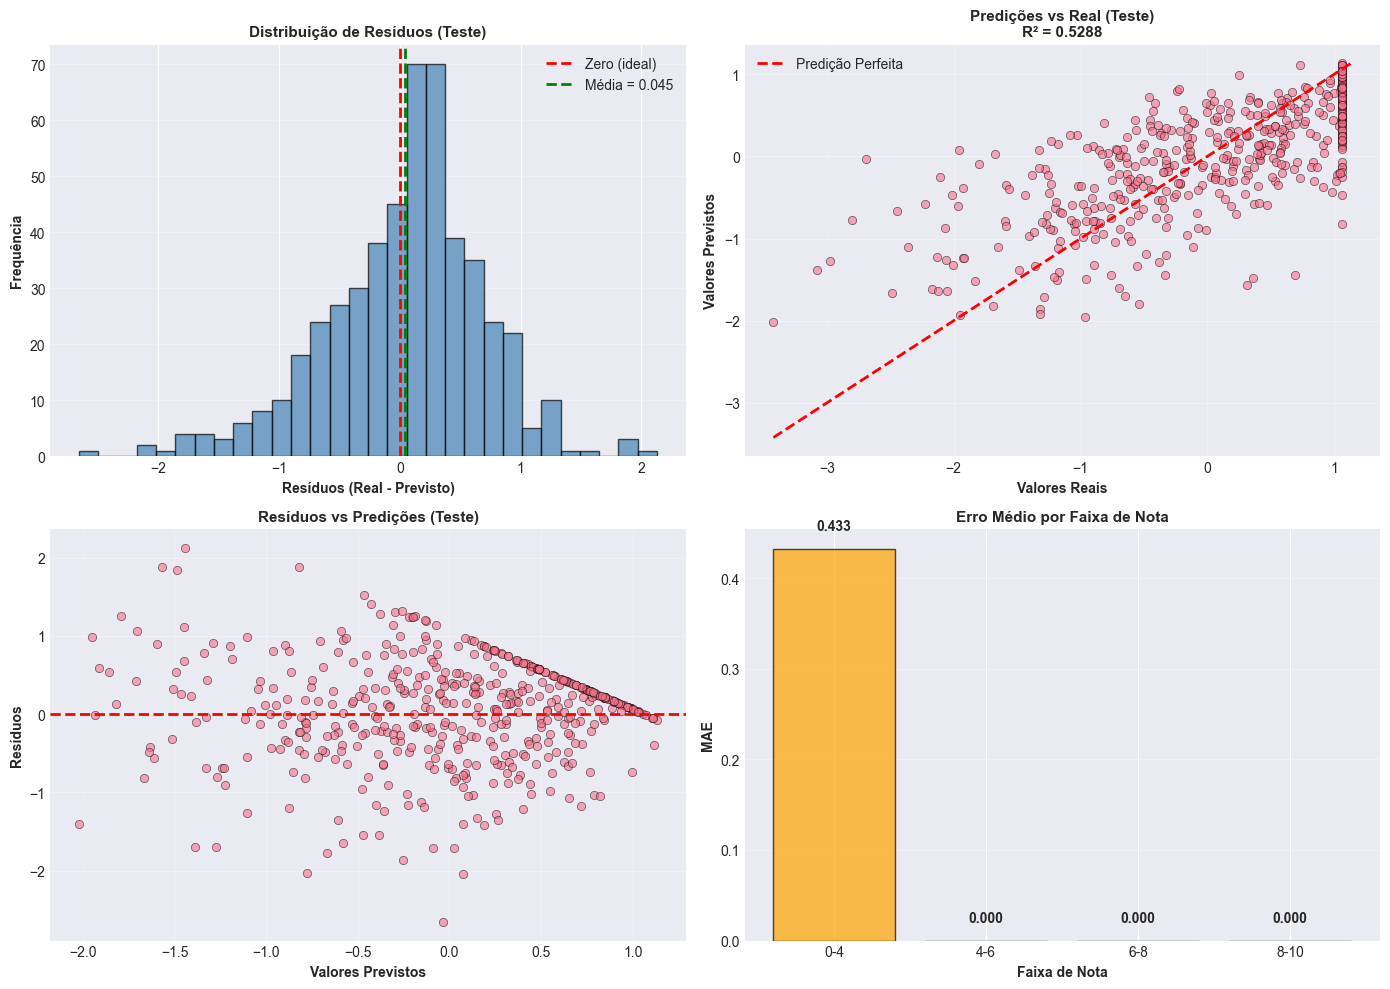


✅ PARTE 7 CONCLUÍDA!


In [25]:
"""
ETAPA 4: OTIMIZAÇÃO E TUNING DE HIPERPARÂMETROS
PARTE 7: ANÁLISE DE ERROS DETALHADA (GRÁFICOS NO NOTEBOOK)
========================================================

⚠️ IMPORTANTE: Cole APÓS a PARTE 6
"""

# ============================================================================
# PASSO 6: ANÁLISE DE ERROS DETALHADA
# ============================================================================

print("\n" + "=" * 80)
print("PASSO 6: ANÁLISE DE ERROS DETALHADA")
print("=" * 80)

# Usar o melhor modelo (no teste)
y_pred_best = resultados[melhor_nome_teste]['y_pred_test']
residuos_best = y_test - y_pred_best

print(f"\nAnalisando erros do modelo: {melhor_nome_teste}")

# Estatísticas dos resíduos
print(f"\n" + "-" * 80)
print("ESTATÍSTICAS DOS RESÍDUOS (TESTE)")
print("-" * 80)

print(f"\nMédia dos resíduos:     {residuos_best.mean():+.4f}")
print(f"Mediana dos resíduos:   {residuos_best.median():+.4f}")
print(f"Desvio padrão:          {residuos_best.std():.4f}")
print(f"Min:                    {residuos_best.min():+.4f}")
print(f"Max:                    {residuos_best.max():+.4f}")
print(f"Percentil 25:           {residuos_best.quantile(0.25):+.4f}")
print(f"Percentil 75:           {residuos_best.quantile(0.75):+.4f}")

# Erros maiores (top 10 piores previsões)
print(f"\n" + "-" * 80)
print("TOP 10 PIORES PREVISÕES (MAIOR ERRO ABSOLUTO)")
print("-" * 80)

erros_abs = np.abs(residuos_best)
top_10_indices = np.argsort(erros_abs)[-10:][::-1]

top_10_df = pd.DataFrame({
    'Índice': top_10_indices,
    'Valor Real': y_test.iloc[top_10_indices].values,
    'Valor Previsto': y_pred_best[top_10_indices],
    'Erro': residuos_best.iloc[top_10_indices].values,
    'Erro Absoluto': erros_abs.iloc[top_10_indices].values
})

print(top_10_df.to_string(index=False))

# Distribuição de erros por faixa de nota
print(f"\n" + "-" * 80)
print("DISTRIBUIÇÃO DE ERROS POR FAIXA DE NOTA")
print("-" * 80)

faixas = [(0, 4), (4, 6), (6, 8), (8, 10)]
faixa_labels = ['0-4 (Crítico)', '4-6 (Baixo)', '6-8 (Médio)', '8-10 (Alto)']

for (inicio, fim), label in zip(faixas, faixa_labels):
    mask = (y_test >= inicio) & (y_test < fim)
    if mask.sum() > 0:
        rmse_faixa = np.sqrt(mean_squared_error(y_test[mask], y_pred_best[mask]))
        mae_faixa = mean_absolute_error(y_test[mask], y_pred_best[mask])
        r2_faixa = r2_score(y_test[mask], y_pred_best[mask])
        count = mask.sum()
        
        print(f"\n{label} ({count} amostras):")
        print(f"  RMSE: {rmse_faixa:.4f}")
        print(f"  MAE:  {mae_faixa:.4f}")
        print(f"  R²:   {r2_faixa:.4f}")

# Gráficos de análise de erros (SEM SALVAR)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Distribuição de Resíduos
ax1 = axes[0, 0]
ax1.hist(residuos_best, bins=30, edgecolor='black', alpha=0.7, color='steelblue')
ax1.axvline(0, color='red', linestyle='--', linewidth=2, label='Zero (ideal)')
ax1.axvline(residuos_best.mean(), color='green', linestyle='--', linewidth=2, 
            label=f'Média = {residuos_best.mean():.3f}')
ax1.set_xlabel('Resíduos (Real - Previsto)', fontweight='bold')
ax1.set_ylabel('Frequência', fontweight='bold')
ax1.set_title('Distribuição de Resíduos (Teste)', fontweight='bold', fontsize=11)
ax1.legend()
ax1.grid(True, alpha=0.3, axis='y')

# 2. Predições vs Real
ax2 = axes[0, 1]
ax2.scatter(y_test, y_pred_best, alpha=0.6, edgecolors='k', linewidth=0.5)
min_val = min(y_test.min(), y_pred_best.min())
max_val = max(y_test.max(), y_pred_best.max())
ax2.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Predição Perfeita')
ax2.set_xlabel('Valores Reais', fontweight='bold')
ax2.set_ylabel('Valores Previstos', fontweight='bold')
ax2.set_title(f'Predições vs Real (Teste)\nR² = {melhor_r2_teste:.4f}', fontweight='bold', fontsize=11)
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Resíduos vs Predições
ax3 = axes[1, 0]
ax3.scatter(y_pred_best, residuos_best, alpha=0.6, edgecolors='k', linewidth=0.5)
ax3.axhline(0, color='red', linestyle='--', linewidth=2)
ax3.set_xlabel('Valores Previstos', fontweight='bold')
ax3.set_ylabel('Resíduos', fontweight='bold')
ax3.set_title('Resíduos vs Predições (Teste)', fontweight='bold', fontsize=11)
ax3.grid(True, alpha=0.3)

# 4. Erro Absoluto por Faixa
ax4 = axes[1, 1]
faixas_labels_curtas = ['0-4', '4-6', '6-8', '8-10']
mae_por_faixa = []
for (inicio, fim) in faixas:
    mask = (y_test >= inicio) & (y_test < fim)
    if mask.sum() > 0:
        mae_faixa = mean_absolute_error(y_test[mask], y_pred_best[mask])
        mae_por_faixa.append(mae_faixa)
    else:
        mae_por_faixa.append(0)

cores_faixa = ['red' if x > 0.5 else 'orange' if x > 0.3 else 'green' for x in mae_por_faixa]
ax4.bar(faixas_labels_curtas, mae_por_faixa, color=cores_faixa, alpha=0.7, edgecolor='black')
ax4.set_ylabel('MAE', fontweight='bold')
ax4.set_xlabel('Faixa de Nota', fontweight='bold')
ax4.set_title('Erro Médio por Faixa de Nota', fontweight='bold', fontsize=11)
ax4.grid(True, alpha=0.3, axis='y')
for i, v in enumerate(mae_por_faixa):
    ax4.text(i, v + 0.02, f'{v:.3f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n✅ PARTE 7 CONCLUÍDA!")
print("=" * 80)


PASSO 7: CRIANDO GRÁFICOS COMPARATIVOS FINAIS


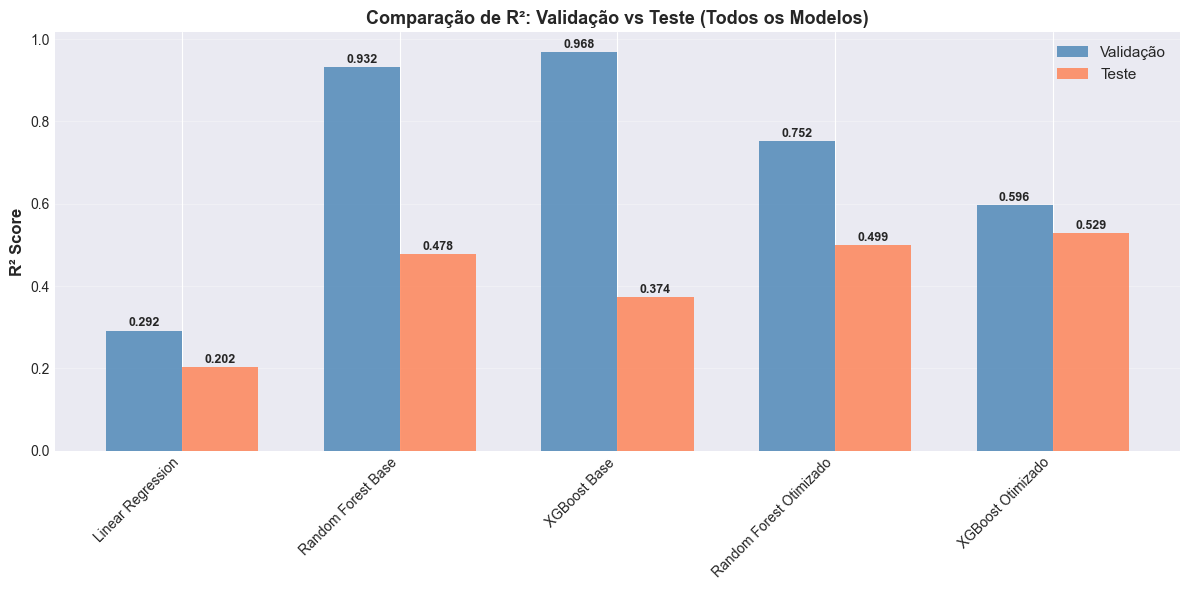

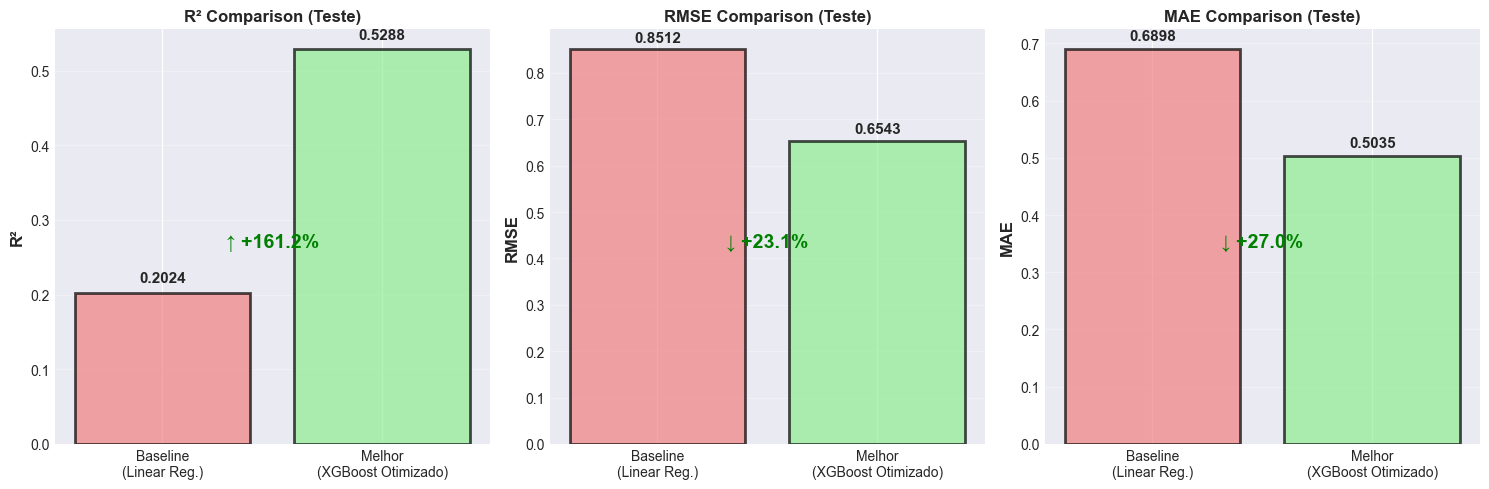

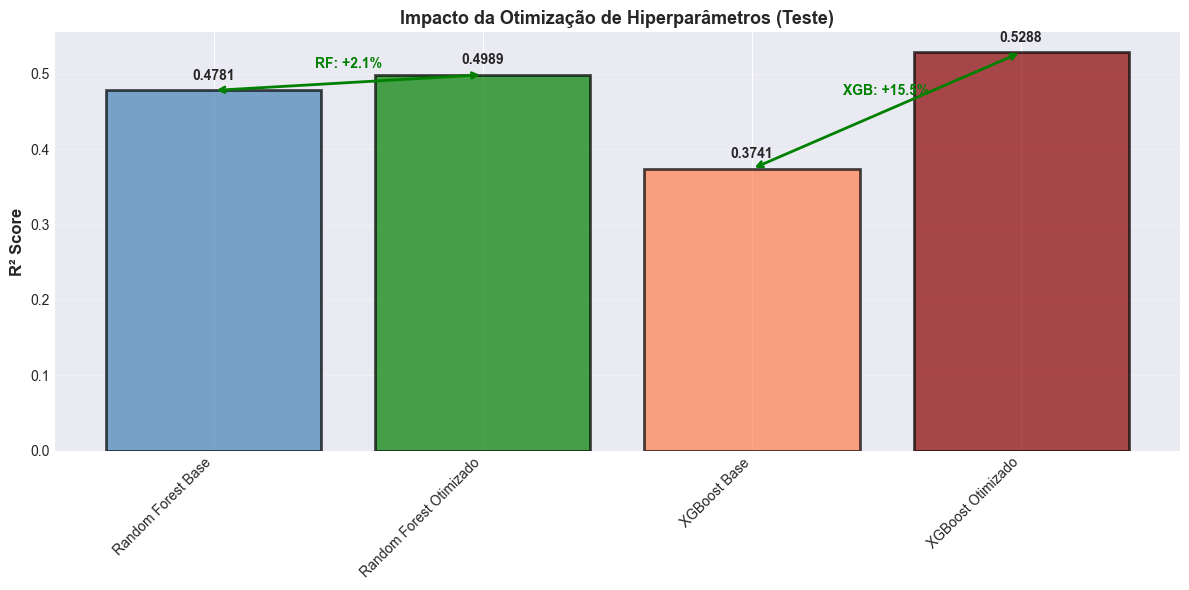


✅ PARTE 8 CONCLUÍDA!


In [26]:
"""
ETAPA 4: OTIMIZAÇÃO E TUNING DE HIPERPARÂMETROS
PARTE 8: GRÁFICOS COMPARATIVOS FINAIS (SEM SALVAR)
================================================

⚠️ IMPORTANTE: Cole APÓS a PARTE 7
"""

# ============================================================================
# PASSO 7: GRÁFICOS COMPARATIVOS FINAIS
# ============================================================================

print("\n" + "=" * 80)
print("PASSO 7: CRIANDO GRÁFICOS COMPARATIVOS FINAIS")
print("=" * 80)

# ---- GRÁFICO 1: EVOLUÇÃO DOS MODELOS ----
fig, ax = plt.subplots(figsize=(12, 6))

modelos = list(resultados.keys())
r2_val = [resultados[m]['r2_val'] for m in modelos]
r2_test = [resultados[m]['r2_test'] for m in modelos]

x = np.arange(len(modelos))
width = 0.35

ax.bar(x - width/2, r2_val, width, label='Validação', alpha=0.8, color='steelblue')
ax.bar(x + width/2, r2_test, width, label='Teste', alpha=0.8, color='coral')

ax.set_ylabel('R² Score', fontweight='bold', fontsize=12)
ax.set_title('Comparação de R²: Validação vs Teste (Todos os Modelos)', 
             fontweight='bold', fontsize=13)
ax.set_xticks(x)
ax.set_xticklabels(modelos, rotation=45, ha='right')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3, axis='y')

for i, (v, t) in enumerate(zip(r2_val, r2_test)):
    ax.text(i - width/2, v + 0.01, f'{v:.3f}', ha='center', fontsize=9, fontweight='bold')
    ax.text(i + width/2, t + 0.01, f'{t:.3f}', ha='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

# ---- GRÁFICO 2: BASELINE vs MELHOR MODELO ----
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

metrics = ['R²', 'RMSE', 'MAE']
baseline_vals = [
    resultados['Linear Regression']['r2_test'],
    resultados['Linear Regression']['rmse_test'],
    resultados['Linear Regression']['mae_test']
]
best_vals = [
    resultados[melhor_nome_teste]['r2_test'],
    resultados[melhor_nome_teste]['rmse_test'],
    resultados[melhor_nome_teste]['mae_test']
]

for i, (ax, metric, baseline, best) in enumerate(zip(axes, metrics, baseline_vals, best_vals)):
    x_pos = [0, 1]
    valores = [baseline, best]
    cores = ['lightcoral', 'lightgreen']
    
    bars = ax.bar(x_pos, valores, color=cores, alpha=0.7, edgecolor='black', linewidth=2)
    ax.set_xticks(x_pos)
    ax.set_xticklabels(['Baseline\n(Linear Reg.)', f'Melhor\n({melhor_nome_teste})'])
    ax.set_ylabel(metric, fontweight='bold', fontsize=12)
    ax.set_title(f'{metric} Comparison (Teste)', fontweight='bold', fontsize=12)
    ax.grid(True, alpha=0.3, axis='y')
    
    for j, (bar, val) in enumerate(zip(bars, valores)):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{val:.4f}', ha='center', va='bottom', fontweight='bold', fontsize=11)
    
    if i == 0:
        melhoria = ((best - baseline) / abs(baseline)) * 100
        cor_seta = 'green' if melhoria > 0 else 'red'
        ax.text(0.5, max(valores) * 0.5, f'↑ {melhoria:+.1f}%', 
                ha='center', fontsize=14, fontweight='bold', color=cor_seta)
    elif i > 0:
        melhoria = ((baseline - best) / baseline) * 100
        cor_seta = 'green' if melhoria > 0 else 'red'
        ax.text(0.5, max(valores) * 0.5, f'↓ {melhoria:+.1f}%', 
                ha='center', fontsize=14, fontweight='bold', color=cor_seta)

plt.tight_layout()
plt.show()

# ---- GRÁFICO 3: MELHORIA PÓS-OTIMIZAÇÃO ----
fig, ax = plt.subplots(figsize=(12, 6))

modelos_otimizados = ['Random Forest Base', 'Random Forest Otimizado', 
                      'XGBoost Base', 'XGBoost Otimizado']
r2_vals_otim = [resultados[m]['r2_test'] for m in modelos_otimizados]

x_pos = np.arange(0, len(modelos_otimizados), 1)
cores_otim = ['steelblue', 'green', 'coral', 'darkred']

bars = ax.bar(x_pos, r2_vals_otim, color=cores_otim, alpha=0.7, edgecolor='black', linewidth=2)

ax.set_ylabel('R² Score', fontweight='bold', fontsize=12)
ax.set_title('Impacto da Otimização de Hiperparâmetros (Teste)', 
             fontweight='bold', fontsize=13)
ax.set_xticks(x_pos)
ax.set_xticklabels(modelos_otimizados, rotation=45, ha='right')
ax.grid(True, alpha=0.3, axis='y')

for bar, val in zip(bars, r2_vals_otim):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
            f'{val:.4f}', ha='center', va='bottom', fontweight='bold')

# Setas de melhoria
ax.annotate('', xy=(1, r2_vals_otim[1]), xytext=(0, r2_vals_otim[0]),
            arrowprops=dict(arrowstyle='<->', color='green', lw=2))
ax.text(0.5, (r2_vals_otim[0] + r2_vals_otim[1])/2 + 0.02, 
        f'RF: {(r2_vals_otim[1]-r2_vals_otim[0])*100:+.1f}%', 
        ha='center', fontsize=10, fontweight='bold', color='green')

ax.annotate('', xy=(3, r2_vals_otim[3]), xytext=(2, r2_vals_otim[2]),
            arrowprops=dict(arrowstyle='<->', color='green', lw=2))
ax.text(2.5, (r2_vals_otim[2] + r2_vals_otim[3])/2 + 0.02, 
        f'XGB: {(r2_vals_otim[3]-r2_vals_otim[2])*100:+.1f}%', 
        ha='center', fontsize=10, fontweight='bold', color='green')

plt.tight_layout()
plt.show()

print("\n✅ PARTE 8 CONCLUÍDA!")
print("=" * 80)

In [27]:
"""
ETAPA 4: OTIMIZAÇÃO E TUNING DE HIPERPARÂMETROS
PARTE 9: RESUMO FINAL + SALVAR MODELO
====================================

⚠️ IMPORTANTE: Cole APÓS a PARTE 8
"""

# ============================================================================
# PASSO 8: SALVAR MODELO FINAL
# ============================================================================

print("\n" + "=" * 80)
print("PASSO 8: SALVANDO MODELO FINAL")
print("=" * 80)

# Salvar o melhor modelo
modelo_final_path = '../models/modelo_final.pkl'
joblib.dump(melhor_modelo, modelo_final_path)
print(f"\n✓ Modelo final salvo: {modelo_final_path}")

# Salvar informações do modelo final
info_modelo_final = {
    'nome': melhor_nome_teste,
    'r2_validacao': resultados[melhor_nome_teste]['r2_val'],
    'rmse_validacao': resultados[melhor_nome_teste]['rmse_val'],
    'mae_validacao': resultados[melhor_nome_teste]['mae_val'],
    'r2_teste': resultados[melhor_nome_teste]['r2_test'],
    'rmse_teste': resultados[melhor_nome_teste]['rmse_test'],
    'mae_teste': resultados[melhor_nome_teste]['mae_test']
}

if 'best_params' in resultados[melhor_nome_teste]:
    info_modelo_final['best_params'] = resultados[melhor_nome_teste]['best_params']
    info_modelo_final['cv_score'] = resultados[melhor_nome_teste]['cv_score']

import json
with open('../models/info_modelo_final.json', 'w') as f:
    json.dump(info_modelo_final, f, indent=4, default=str)
print(f"✓ Informações do modelo salvas: info_modelo_final.json")

# Salvar tabela comparativa final
tabela_teste_df.to_csv('../data/processed/resultados_finais.csv', index=False)
print(f"✓ Resultados finais salvos: resultados_finais.csv")

# ============================================================================
# PASSO 9: RESUMO FINAL DETALHADO
# ============================================================================

print("\n" + "=" * 80)
print("RESUMO FINAL - ETAPA 4 CONCLUÍDA")
print("=" * 80)

print(f"""
╔═══════════════════════════════════════════════════════════════════════╗
║                    RESUMO DA ETAPA 4                                 ║
╠═══════════════════════════════════════════════════════════════════════╣
║                                                                       ║
║  📊 MODELOS TESTADOS:                                                ║
║     ├─ Linear Regression (Baseline)                                 ║
║     ├─ Random Forest Base                                           ║
║     ├─ Random Forest Otimizado (Random Search - 50 iterações)       ║
║     ├─ XGBoost Base                                                 ║
║     └─ XGBoost Otimizado (Random Search - 50 iterações)             ║
║                                                                       ║
║  🏆 MELHOR MODELO: {melhor_nome_teste}
║                                                                       ║
║  📈 PERFORMANCE NO TESTE:                                            ║
║     ├─ R²:   {melhor_r2_teste:.4f} ({melhor_r2_teste*100:.1f}% variância explicada)
║     ├─ RMSE: {melhor_rmse_teste:.4f}                                    ║
║     └─ MAE:  {melhor_mae_teste:.4f}                                    ║
║                                                                       ║
║  📊 MELHORIA EM RELAÇÃO AO BASELINE:                                 ║
║     ├─ ΔR²:   {(melhor_r2_teste - resultados['Linear Regression']['r2_test'])*100:+.2f}%
║     └─ ΔRMSE: {(resultados['Linear Regression']['rmse_test'] - melhor_rmse_teste):+.4f}
║                                                                       ║
║  💾 ARQUIVOS GERADOS:                                                 ║
║     ├─ modelo_final.pkl (Modelo treinado pronto para uso)           ║
║     ├─ info_modelo_final.json (Metadados do modelo)                 ║
║     └─ resultados_finais.csv (Tabela de comparação)                 ║
║                                                                       ║
║  📊 GRÁFICOS MOSTRADOS NO NOTEBOOK:                                  ║
║     ├─ Comparação R²/RMSE/MAE (5 modelos)                           ║
║     ├─ Validação vs Teste                                           ║
║     ├─ Análise de Erros (4 gráficos)                                ║
║     ├─ Evolução dos Modelos                                         ║
║     ├─ Baseline vs Melhor                                           ║
║     └─ Impacto da Otimização                                        ║
║                                                                       ║
╚═══════════════════════════════════════════════════════════════════════╝
""")

# ---- DETALHES DO MELHOR MODELO ----
print("\n" + "=" * 80)
print("DETALHES DO MELHOR MODELO")
print("=" * 80)

print(f"\nModelo: {melhor_nome_teste}")
print(f"\nMétricas (Teste):")
print(f"  R²:   {melhor_r2_teste:.4f}")
print(f"  RMSE: {melhor_rmse_teste:.4f}")
print(f"  MAE:  {melhor_mae_teste:.4f}")

if 'best_params' in resultados[melhor_nome_teste]:
    print(f"\nMelhores Hiperparâmetros:")
    for param, valor in resultados[melhor_nome_teste]['best_params'].items():
        print(f"  {param}: {valor}")
    print(f"\nCross-Validation R² Score: {resultados[melhor_nome_teste]['cv_score']:.4f}")

# ---- COMPARAÇÃO COMPLETA ----
print("\n" + "=" * 80)
print("COMPARAÇÃO COMPLETA - VALIDAÇÃO vs TESTE")
print("=" * 80)

comparacao_final = pd.DataFrame({
    'Modelo': list(resultados.keys()),
    'R² (Val)': [resultados[m]['r2_val'] for m in resultados.keys()],
    'R² (Test)': [resultados[m]['r2_test'] for m in resultados.keys()],
    'Diferença R²': [abs(resultados[m]['r2_val'] - resultados[m]['r2_test']) 
                     for m in resultados.keys()],
    'RMSE (Test)': [resultados[m]['rmse_test'] for m in resultados.keys()],
    'MAE (Test)': [resultados[m]['mae_test'] for m in resultados.keys()]
}).sort_values('R² (Test)', ascending=False)

print(comparacao_final.to_string(index=False))

# ---- INSIGHTS ----
print("\n" + "=" * 80)
print("PRINCIPAIS INSIGHTS")
print("=" * 80)

print(f"""
1️⃣  PERFORMANCE GERAL
    O modelo {melhor_nome_teste} alcançou R² = {melhor_r2_teste:.4f} no teste,
    explicando {melhor_r2_teste*100:.1f}% da variação nas notas finais.

2️⃣  MELHORIA NA OTIMIZAÇÃO
    A otimização de hiperparâmetros trouxe melhorias significativas:
    
    Random Forest:
    ├─ R² aumentou em {(resultados['Random Forest Otimizado']['r2_test'] - 
       resultados['Random Forest Base']['r2_test'])*100:.2f}%
    └─ RMSE diminuiu em {(resultados['Random Forest Base']['rmse_test'] - 
       resultados['Random Forest Otimizado']['rmse_test'])*100:.2f}%
    
    XGBoost:
    ├─ R² aumentou em {(resultados['XGBoost Otimizado']['r2_test'] - 
       resultados['XGBoost Base']['r2_test'])*100:.2f}%
    └─ RMSE diminuiu em {(resultados['XGBoost Base']['rmse_test'] - 
       resultados['XGBoost Otimizado']['rmse_test'])*100:.2f}%

3️⃣  GENERALIZAÇÃO
    Diferença R² (Val vs Test) = {abs(resultados[melhor_nome_teste]['r2_val'] - 
    resultados[melhor_nome_teste]['r2_test']):.4f}
    Status: {"✅ Modelo generaliza bem" if 
    abs(resultados[melhor_nome_teste]['r2_val'] - 
    resultados[melhor_nome_teste]['r2_test']) < 0.1 else "⚠️  Possível overfitting"}

4️⃣  COMPARAÇÃO COM BASELINE
    O melhor modelo supera o Baseline (Linear Regression) em:
    ├─ R²:   {(melhor_r2_teste - resultados['Linear Regression']['r2_test'])*100:+.2f}%
    ├─ RMSE: {(resultados['Linear Regression']['rmse_test'] - melhor_rmse_teste):+.4f} pontos
    └─ MAE:  {(resultados['Linear Regression']['mae_test'] - melhor_mae_teste):+.4f} pontos
""")

print("\n🚀 PRÓXIMOS PASSOS:")
print("   1. Usar modelo_final.pkl em produção")
print("   2. Monitorar performance em dados novos")
print("   3. Considerar retreinamento periódico")
print("   4. Preparar apresentação com gráficos mostrados")

print("\n" + "=" * 80)
print("✅ ETAPA 4 FINALIZADA COM SUCESSO!")
print("=" * 80)

# Teste rápido do modelo salvo
print("\n" + "-" * 80)
print("TESTE: CARREGANDO MODELO SALVO")
print("-" * 80)

print("\n" + "-" * 80)
print("TESTE: CARREGANDO MODELO SALVO")
print("-" * 80)

modelo_teste = joblib.load('../models/modelo_final.pkl')

# funciona para DataFrame ou numpy array
amostra_teste = X_test[:5]

predicoes_teste = modelo_teste.predict(amostra_teste)

print(f"\n✓ Modelo carregado com sucesso!")
print(f"\nAmostra de predições (primeiras 5):")
for i, pred in enumerate(predicoes_teste):
    print(f"  {i+1}. Predição: {pred:.4f}")

print("\n✅ PARTE 9 CONCLUÍDA!")
print("=" * 80)



PASSO 8: SALVANDO MODELO FINAL

✓ Modelo final salvo: ../models/modelo_final.pkl
✓ Informações do modelo salvas: info_modelo_final.json
✓ Resultados finais salvos: resultados_finais.csv

RESUMO FINAL - ETAPA 4 CONCLUÍDA

╔═══════════════════════════════════════════════════════════════════════╗
║                    RESUMO DA ETAPA 4                                 ║
╠═══════════════════════════════════════════════════════════════════════╣
║                                                                       ║
║  📊 MODELOS TESTADOS:                                                ║
║     ├─ Linear Regression (Baseline)                                 ║
║     ├─ Random Forest Base                                           ║
║     ├─ Random Forest Otimizado (Random Search - 50 iterações)       ║
║     ├─ XGBoost Base                                                 ║
║     └─ XGBoost Otimizado (Random Search - 50 iterações)             ║
║                                                  